#TC 5033
# Deep Learning
# Activity 2B
# Team 35:

- Ruben Díaz Garcia - A01371849
- Francisco Antonio Enríquez Cabrera - A01795006
- Jorge Arturo Hernández Morales - A01794908
- Elmer Jiménez Hernández - A01795128
- Kurt Yañez Badelt - A00394053


#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.optim as optim
import torchvision.transforms as transforms

In [2]:
torch.cuda.is_available()

True

In [3]:
DATA_PATH = 'Activity 2b/data'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

# CIFAR-10 Dataset Preparation Summary

This code prepares the CIFAR-10 dataset for a machine learning task:

1. **Data Transformation**:
   - Converts images to tensors
   - Normalizes images using specific mean and standard deviation values

2. **Dataset Creation**:
   - Train set: Uses CIFAR10 training data
   - Validation set: Uses a portion of CIFAR10 test data
   - Test set: Uses the remaining portion of CIFAR10 test data

3. **Data Loaders**:
   - Creates DataLoader objects for each dataset
   - Uses SubsetRandomSampler to control the number of samples
   - Sets a specific batch size for loading

This setup allows for training, validation, and testing of a model on the CIFAR-10 dataset with controlled dataset sizes and standardized data preprocessing.

In [4]:

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True, 
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [5]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: Activity 2b/data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [6]:
train_loader.batch_size

64

In [7]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

tensor([[[[ 1.5050e+00,  1.4257e+00,  1.4098e+00,  ...,  1.5844e+00,
            1.6003e+00,  1.6638e+00],
          [ 1.5209e+00,  1.4415e+00,  1.4257e+00,  ...,  1.6162e+00,
            1.6321e+00,  1.7114e+00],
          [ 1.4733e+00,  1.3939e+00,  1.3780e+00,  ...,  1.5844e+00,
            1.6162e+00,  1.6797e+00],
          ...,
          [ 4.4376e-02,  3.1428e-01, -1.4480e+00,  ..., -8.9236e-01,
           -3.0491e-01,  6.9532e-01],
          [-4.3193e-01,  1.0287e+00,  4.8893e-01,  ..., -6.8596e-01,
            6.7945e-01,  1.4733e+00],
          [ 3.3016e-01,  6.7945e-01,  5.2068e-01,  ...,  3.7779e-01,
            6.0006e-01,  6.7945e-01]],

         [[ 1.7928e+00,  1.6960e+00,  1.6798e+00,  ...,  1.7444e+00,
            1.7766e+00,  1.8573e+00],
          [ 1.8251e+00,  1.7282e+00,  1.7121e+00,  ...,  1.7766e+00,
            1.8089e+00,  1.8896e+00],
          [ 1.7928e+00,  1.6960e+00,  1.6960e+00,  ...,  1.7605e+00,
            1.7928e+00,  1.8573e+00],
          ...,
     

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



tensor([[[[ 2.0607e+00,  2.0607e+00,  2.0607e+00,  ...,  2.0607e+00,
            2.0607e+00,  2.0607e+00],
          [ 2.0290e+00,  2.0449e+00,  2.0607e+00,  ...,  2.0607e+00,
            2.0449e+00,  2.0290e+00],
          [ 2.0290e+00,  2.0607e+00,  2.0607e+00,  ...,  2.0607e+00,
            2.0607e+00,  2.0290e+00],
          ...,
          [ 4.5717e-01,  5.0480e-01,  4.7305e-01,  ...,  2.9840e-01,
            2.6665e-01,  1.0788e-01],
          [ 2.0314e-01,  2.1902e-01,  1.5551e-01,  ...,  2.1902e-01,
           -1.9132e-02, -3.2079e-01],
          [-3.5008e-02, -2.8904e-01, -2.5728e-01,  ...,  2.3490e-01,
            3.7779e-01,  1.2376e-01]],

         [[ 2.1317e+00,  2.1317e+00,  2.1317e+00,  ...,  2.1317e+00,
            2.1317e+00,  2.1317e+00],
          [ 2.0994e+00,  2.1155e+00,  2.1317e+00,  ...,  2.1317e+00,
            2.1155e+00,  2.0994e+00],
          [ 2.0994e+00,  2.1317e+00,  2.1317e+00,  ...,  2.1317e+00,
            2.1317e+00,  2.0994e+00],
          ...,
     

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [8]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


The shown image is a: truck


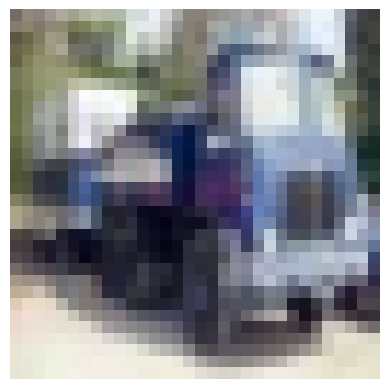

In [9]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'The shown image is a: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


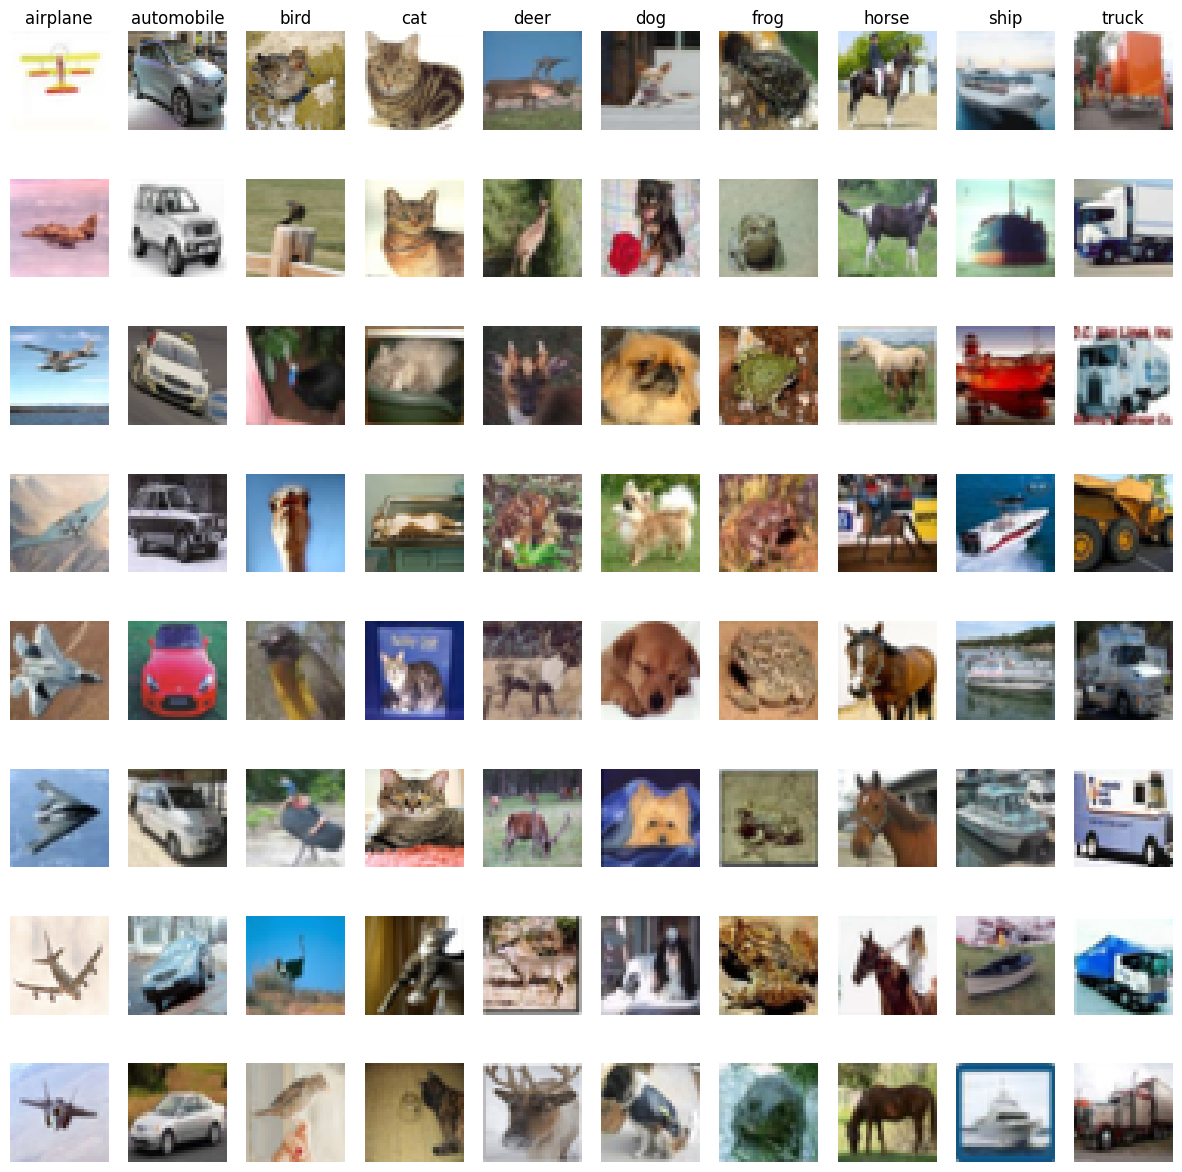

In [10]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')
            
            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid() 

___
## Calculate Accuracy

### Detailed Explanation of the `accuracy` Function

This code defines a function called `accuracy` that evaluates the performance of a machine learning model, specifically for a classification task. Let's break it down in detail:

#### Function Definition

```python
def accuracy(model, loader, device='cpu'):

This function takes three parameters:

model: The machine learning model to evaluate
loader: A data loader that provides batches of input data and labels
device: The device to run the computation on (default is 'cpu', but could be 'cuda' for GPU)


model.eval()

sets the model to evaluation mode. This is important for models with layers like dropout or batch normalization since they behave different during training and evaluation


In [11]:
def accuracy(model, loader, device='cpu'):
    model.eval()
    correct = 0 # Counter for correct predictions
    total = 0 # Counter for total samples

    # Disable gradient tracking for evaluation to speed up the process
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Get the model's prediction
            outputs = model(inputs)

            # Takes the class with the highest probability
            _, predicted = torch.max(outputs.data, 1)

            # Calculate the total number of samples
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate the percentage of correct predictions
    return 100 * correct / total

___
## Training Loop

### Detailed Explanation of Model Training and Validation Loop

This code snippet represents a typical training and validation loop for a PyTorch model. Let's break it down step by step:

#### Device Configuration

```python
model.to(device)

Moves the model to the specified device cpu or gpu

model.train()
puts the in tranining mode, as metioned before, the model will behave differently from eval to train


In [12]:
# Training function adapted for handling both models
def train(model, train_loader, val_loader, optimizer, criterion, epochs=10, device='cpu'):
    model.to(device)

    for epoch in range(epochs):
        model.train()  # set the model to training mode
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # if is a linear model, flatten the inputs
            if isinstance(model, LinearModel):
                inputs = inputs.view(inputs.size(0), -1)  # Flatten the inputs

            optimizer.zero_grad()  # Clear the gradients

            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss

            loss.backward()  # backpropagation
            optimizer.step()  # update weights

            running_loss += loss.item() * inputs.size(0)

        # print the average loss per epoch
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader.dataset):.4f}')

        # Validation loss
        val_loss = 0.0
        model.eval()  # set the model to evaluation mode
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # if is a linear model, flatten the inputs
                if isinstance(model, LinearModel):
                    inputs = inputs.view(inputs.size(0), -1)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

        print(f'Validation Loss: {val_loss/len(val_loader.dataset):.4f}')


___
## Linear Model
#### Use PyTorch to create a linear model to have an initial baseline model

### LinearModel Class Summary

This code defines a simple linear neural network model using PyTorch:

1. **Class Definition**:
   - Inherits from `nn.Module`, PyTorch's base class for all neural network modules

2. **Initialization**:
   - Takes `input_size` and `num_classes` as parameters
   - Creates a single fully connected (linear) layer

3. **Forward Method**:
   - Flattens the input tensor
   - Passes the flattened input through the linear layer
   - Returns the output

This model represents a basic linear classifier, suitable for simple classification tasks or as a baseline model for more complex problems.

In [13]:
class LinearModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LinearModel, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(x.size(0), -1)
        out = self.fc(x)
        return out

___
## Sequential CNN

### Use PyTorch to implement a CNN model, accuracy should be better than the Linear Model

### CNNModel Class Summary

This code defines a Convolutional Neural Network (CNN) model using PyTorch:

1. **Class Definition**:
   - Inherits from `nn.Module`, PyTorch's base class for neural networks

2. **Initialization**:
   - Takes `num_classes` as a parameter
   - Defines the network architecture:
     - Two convolutional layers (conv1, conv2)
     - Max pooling layer
     - Two fully connected layers (fc1, fc2)

3. **Forward Method**:
   - Processes input through convolutional and pooling layers
   - Applies ReLU activation after each convolutional layer
   - Flattens the output of convolutional layers
   - Passes through fully connected layers
   - Returns the final output

This CNN model is designed for image classification tasks, specifically for RGB images (3 input channels). It uses a combination of convolutional, pooling, and fully connected layers to extract features and make predictions.

In [14]:
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # Convolutional layer 1, 3 input channels, 32 output channels, stride of 1, padding of 1
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # Second convolutional layer, 32 input channels, 64 output channels, stride of 1, padding of 1
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Fully connected layer, 64*8*8 input features, 128 output features
        self.fc2 = nn.Linear(128, num_classes)  #  Output layer, 128 input features, num_classes output features

    def forward(self, x):
        # feed the input tensor through the layers
        x = self.pool(F.relu(self.conv1(x)))  # First convolutional layer output
        x = self.pool(F.relu(self.conv2(x)))  # Second convolutional layer output

        # Flatten the tensor before passing it through the fully connected layers
        x = x.view(x.size(0), -1)  # Flatten the tensor

        # Fully connected layers, with ReLU activation function, except for the output layer
        x = F.relu(self.fc1(x))  # fully connected layer 1
        x = self.fc2(x)  # output layer
        return x

___
## Create the models and execute

## Linear Model:

In [15]:
# Create a Linear Model instance
input_size = 3 * 32 * 32  # 3 channels, 32x32 images, input size for the linear model
model = LinearModel(input_size=input_size, num_classes=24)

# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Train the model, using the train and validation loaders, the optimizer, loss function, and the device (cuda or cpu)
train(model, train_loader, val_loader, optimizer, criterion, epochs=10, device='cuda')

# Evaluate the model on the test set, using the accuracy function
test_accuracy = accuracy(model, test_loader, device='cuda')
print(f'Linear Model Test Accuracy: {test_accuracy:.2f}%')

Epoch [1/10], Loss: 2.2573
Validation Loss: 1.0606
Epoch [2/10], Loss: 2.0508
Validation Loss: 0.9977
Epoch [3/10], Loss: 1.9654
Validation Loss: 1.0269
Epoch [4/10], Loss: 1.9191
Validation Loss: 0.9956
Epoch [5/10], Loss: 1.8872
Validation Loss: 0.9947
Epoch [6/10], Loss: 1.8812
Validation Loss: 0.9761
Epoch [7/10], Loss: 1.8724
Validation Loss: 0.9722
Epoch [8/10], Loss: 1.8609
Validation Loss: 0.9998
Epoch [9/10], Loss: 1.8544
Validation Loss: 0.9650
Epoch [10/10], Loss: 1.8437
Validation Loss: 0.9331
Linear Model Test Accuracy: 35.82%


___
## CNN Model:


In [16]:
# Create CNN model
model = CNNModel(num_classes=24)

# Define the optimizer and loss function, using the Adam optimizer and the CrossEntropyLoss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam works well for CNNs and other deep networks
criterion = nn.CrossEntropyLoss()  # Loss function for classification problems

# Train the CNN model,  using the train and validation loaders, the optimizer, loss function, and the device (cuda or cpu)
train(model, train_loader, val_loader, optimizer, criterion, epochs=10, device='cuda')

# Evaluate the model on the test set, using the accuracy function
test_accuracy = accuracy(model, test_loader, device='cuda')
print(f'CNN Model Test Accuracy: {test_accuracy:.2f}%')

Epoch [1/10], Loss: 1.3193
Validation Loss: 0.5540
Epoch [2/10], Loss: 0.9457
Validation Loss: 0.4609
Epoch [3/10], Loss: 0.7961
Validation Loss: 0.4386
Epoch [4/10], Loss: 0.6834
Validation Loss: 0.4156
Epoch [5/10], Loss: 0.5807
Validation Loss: 0.4219
Epoch [6/10], Loss: 0.4941
Validation Loss: 0.4375
Epoch [7/10], Loss: 0.4092
Validation Loss: 0.4694
Epoch [8/10], Loss: 0.3309
Validation Loss: 0.5190
Epoch [9/10], Loss: 0.2652
Validation Loss: 0.5638
Epoch [10/10], Loss: 0.2126
Validation Loss: 0.6256
CNN Model Test Accuracy: 71.04%


# Activity 2b Conclusion and model justification:
Taking into consideration all tests performed by team members, we choose this model because it was the best performing overall. 
We found during our tests that the Adam optimizer work well for CNN so we stuck with it.
